<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw04_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Volatility calibration to BSM**

## **Abstract**

- Goal
    - Calibrate BSM model for makert price of options


## **Problem**

All of pricing models require a set of model parameters in order to fully define the dynamics of each model. The process of adjusting model parameters such that the model prices are compatible with market prices is called **Calibration**. 

Input:

- market prices of several options with different strikes and maturities
- spot price
- interest rates

Output:

- Find volatility of BSM model

## **Anal**


Suppose
- Model prameter $\theta = (\theta_1, ... \theta_m)$ is a vector
- Prices of $n$ instruments are aviable in the market with its market price of $i$th instrument quoted by $C_i$. 
Let's denote $C = (C_1, ..., C_n)$ as a market price vector.
- In theory, $C_i^\theta$ is the model price of the $i$th instrument, and they are denoted as a vector $C^\theta = (C_1^\theta, ...,  C^\theta_n)$. 

Given a distance function $H: \mathbb R^n \times \mathbb R^n \mapsto \mathbb R^+$, calibration is to find the parameter $\theta^*$  which minimize the objective function $H(C^\theta, C)$, i.e.
$$ \theta^* = \arg\min_\theta H(C^\theta, C).$$

Commonly used distance functions for $H$ are 
- $H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^p)^{1/p}.$
- $H(x, y) = (\sum_{i=1}^n w_i | \frac{x_i - y_i}{y_i}|^p)^{1/p}.$ If $p = 2$, $w_i =1$, then $H^2$ is called as SSRE (sum of squred relative errors)
- $H(x, y) = (\sum_{i=1}^n w_i |\ln x - \ln y|^p)^{1/p}.$

In this below, we are goint to use, the first case of $H$ with $p = 2$ and $w_i = 1$ for all i's.

# **Hw Tasks**

## **Task-1**

- Upload data from [here](https://github.com/songqsh/20s_ma573/blob/master/src/20optiondata2.dat) to your cloud platform
- Calibration/Performance:
  - Filter out 2-mon options and calibrate volatility using the distance function
$$H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^2)^{1/2}.$$
  - Calibrated price for option means the computed option price using calibrated volatility and other parameters given by the market. Compare the market price and calibrated price using a plot of two curves: strike vs market (calibrated) price
- Do the same thing for the filter from 5-mon options.
- Which calibrated volatility is bigger, 2-mon or 5-mon?


In [2]:
%cd~

!git clone https://github.com/cengaiyeung/20MA573.git 
pass

/root
Cloning into '20MA573'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 228 (delta 14), reused 0 (delta 0), pack-reused 197
Receiving objects: 100% (228/228), 473.38 KiB | 11.83 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [3]:
%cd 20MA573/src00/
%ls

/root/20MA573/src00
20bsm01_test.ipynb   20european_options_class.ipynb  bsm01.py
20bsm_formula.ipynb  20optiondata2.txt


In [0]:
from bsm01 import *
import numpy as np
import scipy.optimize as so
import scipy.stats as ss
import matplotlib.pyplot as plt


In [5]:
#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data = np.loadtxt('20optiondata2.txt', comments='#', delimiter=',')

print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


In [0]:
'''==============
below defines for underlying process
================='''
gbm1 = Gbm(
    init_state = 100., #market data
    drift_ratio = .05, #market data
    vol_ratio = .1 #initial guess
)

In [0]:
'''====================
create option_list from the data
======================='''

num_row = np_option_data.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data[i,0],
      strike = np_option_data[i,2],
      maturity = np_option_data[i,1],
      market_price = np_option_data[i,3]
  )   
  option_list.append(option1)

In [0]:
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  error = 0
  for i in np.arange(len(option_list)):
    error = error + ((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2    
  return error


'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]

In [9]:
# Take options of 2-months maturity
filter1 = list(filter(lambda x: x.maturity == 2/12, option_list))
calibrated_volatility1 = bsm_calibration(gbm1, filter1)
print('2-mon calibrated_volatility is' ,calibrated_volatility1)

2-mon calibrated_volatility is 0.18109375000000028


In [10]:
gbm1.vol_ratio = calibrated_volatility1

calibrated_price_list1 = [gbm1.bsm_price(filter1[i]) for i in range(len(filter1))]
print('The option price calculated from calibrated volatility is')
print(calibrated_price_list1)

The option price calculated from calibrated volatility is
[5.184221823763238, 3.9225121216534404, 2.8709333662230563, 2.0297005112870465]


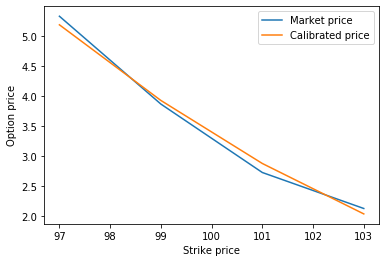

In [11]:
x = [filter1[i].strike for i in range(len(filter1))]
y1 = [filter1[i].market_price for i in range(len(filter1))]
plt.plot(x, y1, label='Market price')

y2 = calibrated_price_list1
plt.plot(x, y2, label = 'Calibrated price')

plt.ylabel('Option price')
plt.xlabel('Strike price')
plt.legend();

In [12]:
# Take options of 5-months maturity
filter2 = list(filter(lambda x: x.maturity == 5/12, option_list))
calibrated_volatility2 = bsm_calibration(gbm1, filter2)
print('5-mon calibrated_volatility is' ,calibrated_volatility2)

5-mon calibrated_volatility is 0.1839843750000003


In [13]:
gbm1.vol_ratio = calibrated_volatility2

calibrated_price_list2 = [gbm1.bsm_price(filter2[i]) for i in range(len(filter2))]
print('The option price calculated from calibrated volatility is')
print(calibrated_price_list2)

The option price calculated from calibrated volatility is
[7.540104147003916, 6.340281448569769, 5.270421573192927, 4.330492653848275]


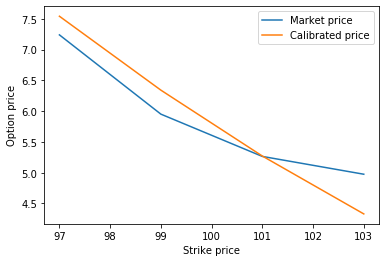

In [14]:
x = [filter2[i].strike for i in range(len(filter2))]
y1 = [filter2[i].market_price for i in range(len(filter2))]
plt.plot(x, y1, label='Market price')

y2 = calibrated_price_list2
plt.plot(x, y2, label = 'Calibrated price')

plt.ylabel('Option price')
plt.xlabel('Strike price')
plt.legend();

We know the calibrated volatility for 2-mon is 0.18109375000000028, 0.1839843750000003 for 5-mon calibrated volatility. So, we have observed that 5-mon is bigger.